# 프로젝트 개요:

> 직접 설정한 포지션에 적합한 데이터셋을 구하고, 그에 맞는 가설을 세워 딥러닝 파이프라인을 구축해 가설을 검증하는 것



# 프로젝트 절차:
<br>

### **1) 주제 선정** <br>
- 프로젝트 주제

<br>

### **2) 데이터 선정** <br>
- 데이터셋

- Features

<br>

### **3) 데이터 선정 이유** <br>

- 데이터 선정 이유

<br>

### **4) 문제 정의 및 가설 수립** <br>

- 문제 정의 

- 가설 설정

<br>

### **5) 데이터 전처리** <br>

- EDA

- 텍스트 전처리

<br>

### **6) 딥러닝 모델 생성** <br>

- 모델 파이프라인 구축


<br> 

### **7) 모델 평가** <br>

- 모델 평가

<br>

### **8) 결론** <br>

- 결론

- 한계점 및 추후 해결 방안


<br>

## 1. 주제 선정

영어-프랑스어 기계 번역 모델

## 2. 데이터 선정

### 1) 데이터셋

- [French - English](http://www.manythings.org/anki/)

   - 영어-프랑스어 병렬 말뭉치 

### 2) Features

- 영어
- 프랑스어

## 3. 데이터 선정 이유

- 전 세계 사람들이 언어 장벽 없이 자유롭게 소통할 수 있을 만큼 정확한 번역 모델을 만드는 데 기여하는 것이 목표

- 전공을 적용해 보고 싶어 프랑스어로 선택

## 4. 문제 정의 및 가설 수립

### 1) 문제 정의


**자연어 이해(NLU)**와 **자연어 생성(NLG)** <br>

=> 기계 번역(Machine Translation)

### 2) 가설 수립


> 10만 개의 데이터로 학습된 번역 모델은 문법적 특성을 지키지 못한다.



## 5. 데이터 전처리


### 1) 패키지와 라이브러리 불러오기

In [ ]:
!pip install -U tensorflow-text

In [ ]:
import collections
import logging
import os
import pathlib
import re
import string
import sys
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_text as text
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
logging.getLogger('tensorflow').setLevel(logging.ERROR) 

### 2) 데이터셋 로드 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 영어-불어 데이터셋 불러오기
#fra_txt = '/content/drive/MyDrive/Colab Notebooks/AI 부트캠프 9기/Section 04/Project_Section 04/데이터셋_Project_Section 04/원본/fra.txt'
#f_txt = pd.read_table(fra_txt)

In [ ]:
# txt 파일을 csv 파일로 변환
#f_txt.to_csv("./fra_csv.csv",index=False)

In [ ]:
# 영어-불어 데이터셋 csv 파일 불러오기
fra_csv = '/content/drive/MyDrive/Colab Notebooks/AI 부트캠프 9기/Section 04/Project_Section 04/데이터셋_Project_Section 04/csv/fra_csv.csv'
f_csv = pd.read_csv(fra_csv)

In [ ]:
f_csv 

,Go.,Va !,CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)
0,Go.,Marche.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Go.,Bouge !,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2,Hi.,Salut !,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
3,Hi.,Salut.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
4,Run!,Cours !,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
...,...,...,...
192335,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
192336,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
192337,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
192338,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


### 3) EDA

In [ ]:
# column 전처리 함수 

def drop_rename_col(df):

  # 필요없는 column 삭제
  dels = [col for col in df.columns if ('CC' in col)]
  df.drop(columns=dels, inplace=True)

  # 칼럼 명 변경
  df.columns = ['eng', 'fra']

  return df

In [ ]:
# 데이터셋에 drop_rename_col 함수 적용 
eng_fra_csv = drop_rename_col(f_csv)

In [ ]:
eng_fra_csv

,eng,fra
0,Go.,Marche.
1,Go.,Bouge !
2,Hi.,Salut !
3,Hi.,Salut.
4,Run!,Cours !
...,...,...
192335,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...
192336,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...
192337,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...
192338,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...


In [ ]:
# 데이터셋 크기
eng_fra_csv.shape

(192340, 2)

In [ ]:
# info
eng_fra_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192340 entries, 0 to 192339
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   eng     192340 non-null  object
 1   fra     192340 non-null  object
dtypes: object(2)
memory usage: 2.9+ MB


In [ ]:
# 결측치 확인
eng_fra_csv.isnull().sum()

eng    0
fra    0
dtype: int64

In [ ]:
# 중복 확인
eng_fra_csv.T.duplicated()

eng    False
fra    False
dtype: bool

In [ ]:
# 10만 개의 데이터 랜덤 추출 함수

def extract_sample(df):

  # 추출할 데이터 개수: 100000, 비복원 추출, random_state=42, index reset 
  df = df.sample(n=100000, replace=False, random_state=42, ignore_index=True)

  return df

In [ ]:
# 전체 데이터셋에서 10만 개의 데이터 추출
eng_fra_10 = extract_sample(eng_fra_csv)

In [ ]:
eng_fra_10

,eng,fra
0,I'm as curious as you are.,Je suis aussi curieux que vous.
1,What kind of things do you enjoy doing?,À quelle sorte de choses prenez-vous plaisir ?
2,Just stay there.,Reste ici.
3,It's your bedtime.,C'est l'heure d'aller te coucher.
4,Who wears the pants in your family?,Qui porte la culotte dans votre famille ?
...,...,...
99995,Nobody really knows.,Personne ne sait vraiment.
99996,"All in all, the international conference was a...","Globalement, la conférence internationale fut ..."
99997,Let's hope he's all right.,Espérons qu'il va bien.
99998,I'm begging you. Don't make me laugh. I did to...,Je t'en supplie. Ne me fais pas rire. J'ai fai...


In [ ]:
# train/test 셋으로 나누기
train, test = train_test_split(eng_fra_10, test_size=0.2)

print('train shape :', train.shape)
print('test shape :', test.shape)

train shape : (80000, 2)
test shape : (20000, 2)


In [ ]:
# tf.data.Dataset 으로 변환하는 함수 

def tf_dataset(df):

  eng = df['eng']
  fra = df['fra']
  
  df_dataset = tf.data.Dataset.from_tensor_slices((eng,fra))

  return df_dataset

In [ ]:
# train/test 셋을 tf.data.Dataset 으로 변환
train_dataset = tf_dataset(train)
test_dataset = tf_dataset(test)

In [ ]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
test_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [ ]:
# train_dataset의 데이터 확인
for en_examples, fr_examples in train_dataset.batch(3).take(1):
  for en in en_examples.numpy():
    print(en.decode('utf-8'))

  print()

  for fr in fr_examples.numpy():
    print(fr.decode('utf-8'))

He stayed in bed because he wasn't feeling well.
First of all, I must say this.
She was clinging to her father.

Il est resté au lit parce qu'il ne se sentait pas bien.
Tout d'abord, je dois dire ceci.
Elle se cramponnait à son père.


### 4) 텍스트 전처리

In [ ]:
for en, fr in train_dataset.take(1):
  print("English: ", en.numpy().decode('utf-8'))
  print("French: ", fr.numpy().decode('utf-8'))

English:  He stayed in bed because he wasn't feeling well.
French:  Il est resté au lit parce qu'il ne se sentait pas bien.


In [ ]:
train_en = train_dataset.map(lambda en, fr: en)
train_fr = train_dataset.map(lambda en, fr: fr)

In [ ]:
# 데이터셋에서 어휘 생성

In [ ]:
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

In [ ]:
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    vocab_size = 15000,
    reserved_tokens=reserved_tokens,
    bert_tokenizer_params=bert_tokenizer_params,
    learn_params={},
)

In [ ]:
# 영어 데이터에서 어휘 생성

In [ ]:
%%time
en_vocab = bert_vocab.bert_vocab_from_dataset(
    train_en.batch(1000).prefetch(2),
    **bert_vocab_args
)

CPU times: user 31.2 s, sys: 645 ms, total: 31.8 s
Wall time: 30.9 s


In [ ]:
# 어휘 확인
print(en_vocab[1000:1010])

['guitar', 'impossible', 'joke', 'knife', 'movies', 'passed', 'showed', 'staying', 'television', 'vacation']


In [ ]:
# 어휘 파일 작성
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w') as f:
    for token in vocab:
      print(token, file=f)

In [ ]:
write_vocab_file('en_vocab.txt', en_vocab)

In [ ]:
# 프랑스어 데이터에서 어휘 생성

In [ ]:
%%time
fr_vocab = bert_vocab.bert_vocab_from_dataset(
    train_fr.batch(1000).prefetch(2),
    **bert_vocab_args
)

CPU times: user 1min 3s, sys: 682 ms, total: 1min 3s
Wall time: 1min 12s


In [ ]:
# 어휘 확인
print(fr_vocab[1000:1010])

['pommes', 'quitte', 'regles', 'tableau', '##rer', '##ront', 'arme', 'aviez', 'calme', 'doute']


In [ ]:
# 어휘 파일 생성
write_vocab_file('fr_vocab.txt', fr_vocab)

In [ ]:
# CustomTokenizer 생성

In [ ]:
START = tf.argmax(tf.constant(reserved_tokens) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens) == "[END]")

def add_start_end(ragged):
  count = ragged.bounding_shape()[0]
  starts = tf.fill([count,1], START)
  ends = tf.fill([count,1], END)
  return tf.concat([starts, ragged, ends], axis=1)

In [ ]:
def cleanup_text(reserved_tokens, token_txt):
  bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
  bad_token_re = "|".join(bad_tokens)

  bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
  result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

  result = tf.strings.reduce_join(result, separator=' ', axis=-1)

  return result

In [ ]:
class CustomTokenizer(tf.Module):
  def __init__(self, reserved_tokens, vocab_path):
    self.tokenizer = text.BertTokenizer(vocab_path, lower_case=True)
    self._reserved_tokens = reserved_tokens
    self._vocab_path = tf.saved_model.Asset(vocab_path)

    vocab = pathlib.Path(vocab_path).read_text().splitlines()
    self.vocab = tf.Variable(vocab)
 

    self.tokenize.get_concrete_function(
        tf.TensorSpec(shape=[None], dtype=tf.string))

    self.detokenize.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.detokenize.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    self.lookup.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int64))
    self.lookup.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int64))

    self.get_vocab_size.get_concrete_function()
    self.get_vocab_path.get_concrete_function()
    self.get_reserved_tokens.get_concrete_function()

  @tf.function
  def tokenize(self, strings):
    enc = self.tokenizer.tokenize(strings)
    enc = enc.merge_dims(-2,-1)
    enc = add_start_end(enc)
    return enc

  @tf.function
  def detokenize(self, tokenized):
    words = self.tokenizer.detokenize(tokenized)
    return cleanup_text(self._reserved_tokens, words)

  @tf.function
  def lookup(self, token_ids):
    return tf.gather(self.vocab, token_ids)

  @tf.function
  def get_vocab_size(self):
    return tf.shape(self.vocab)[0]

  @tf.function
  def get_vocab_path(self):
    return self._vocab_path

  @tf.function
  def get_reserved_tokens(self):
    return tf.constant(self._reserved_tokens)

In [ ]:
# 각 언어에 대해 CustomTokenizer 생성
tokenizers = tf.Module()
tokenizers.en = CustomTokenizer(reserved_tokens, 'en_vocab.txt')
tokenizers.fr = CustomTokenizer(reserved_tokens, 'fr_vocab.txt')

In [ ]:
# tokenizers 저장하기 
model_name = 'en_fr_tokenizers'
tf.saved_model.save(tokenizers, model_name)

In [ ]:
# 저장된 tokenizers 가져오기
tokenizers = tf.saved_model.load('en_fr_tokenizers')

In [ ]:
tokenizers.en.get_vocab_size().numpy()

3347

In [ ]:
tokenizers.fr.get_vocab_size().numpy()

4377

In [ ]:
# 프랑스어 문장 예시 
for fr in fr_examples.numpy():
  print(fr.decode('utf-8'))

Il est resté au lit parce qu'il ne se sentait pas bien.
Tout d'abord, je dois dire ceci.
Elle se cramponnait à son père.


In [ ]:
# 토큰화
encoded = tokenizers.fr.tokenize(fr_examples)

for row in encoded.to_list():
  print(row)

[2, 68, 64, 293, 101, 403, 630, 86, 9, 68, 70, 106, 2012, 65, 142, 15, 3]
[2, 93, 33, 9, 1620, 13, 62, 182, 146, 201, 15, 3]
[2, 85, 106, 32, 574, 1364, 1416, 3246, 336, 30, 118, 217, 15, 3]


In [ ]:
# detokenize로 다시 텍스트로 변환
round_trip = tokenizers.fr.detokenize(encoded)
for line in round_trip.numpy():
  print(line.decode('utf-8'))

il est reste au lit parce qu ' il ne se sentait pas bien .
tout d ' abord , je dois dire ceci .
elle se cramponnait a son pere .


In [ ]:
# 입력 파이프라인 설정

In [ ]:
# 텍스트 배치 인코딩
def tokenize_pairs(en, fr):

    en = tokenizers.en.tokenize(en)
    en = en.to_tensor()

    fr = tokenizers.fr.tokenize(fr)
    fr = fr.to_tensor()
    
    return en, fr

In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [ ]:
# batches 생성
def make_batches(ds):
  return (
      ds
      .cache()
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(tokenize_pairs, num_parallel_calls=tf.data.AUTOTUNE)
      .prefetch(tf.data.AUTOTUNE))

In [ ]:
# train/test dataset에 적용
train_batches = make_batches(train_dataset)
test_batches = make_batches(test_dataset)

## 6. 딥러닝 모델 생성

### 1) 위치 인코딩 (positional encoding)

In [ ]:
# sin, cos 안에 들어갈 수치 구하기
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [ ]:
# 위치 인코딩 (positional encoding)
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  # 짝수번째 인덱스에 sin 함수 적용
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # 홀수번째 인덱스에 cos 함수 적용
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return tf.cast(pos_encoding, dtype=tf.float32)

### 2) padding mask

In [ ]:
# padding_mask
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
  return seq[:, tf.newaxis, tf.newaxis, :]  

### 3) look ahead mask

In [ ]:
# look_ahead_mask
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  

### 4) scaled dot product attention 

In [ ]:
# scaled_dot_product_attention 
# Attention의 가중치를 구하는 함수
def scaled_dot_product_attention(q, k, v, mask):

  matmul_qk = tf.matmul(q, k, transpose_b=True)  

  # 쿼리와 키의 내적을 dk의 제곱근으로 스케일링
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # 마스킹 적용
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  # softmax 함수로 attention 가중치 구하기
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1) 

  output = tf.matmul(attention_weights, v)  

  return output, attention_weights

### 5) Multi-Head (Self) Attention

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  
    k = self.wk(k)  
    v = self.wv(v)  

    q = self.split_heads(q, batch_size)  
    k = self.split_heads(k, batch_size)  
    v = self.split_heads(v, batch_size)  

    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))  

    output = self.dense(concat_attention)  

    return output, attention_weights

### 6) FFNN (Feed Forward Neural Network)

In [ ]:
# FFNN (Feed Forward Neural Network)
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  
      tf.keras.layers.Dense(d_model)  
  ])

### 7) Encoder Layer

- Multi-Head (Self) Attention
- FFNN

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  
    attn_output = self.dropout1(attn_output, training=training)
    out1 = self.layernorm1(x + attn_output)  

    ffn_output = self.ffn(out1) 
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output) 

    return out2

### 8) Decoder Layer

- Masked Multi-Head (Self) Attention
- Multi-Head (Encoder-Decoder) Attention
- FFNN

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(DecoderLayer, self).__init__()

    self.mha1 = MultiHeadAttention(d_model, num_heads)
    self.mha2 = MultiHeadAttention(d_model, num_heads)

    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)
    self.dropout3 = tf.keras.layers.Dropout(rate)

  def call(self, x, enc_output, training,
           look_ahead_mask, padding_mask):

    attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)  
    attn1 = self.dropout1(attn1, training=training)
    out1 = self.layernorm1(attn1 + x)

    attn2, attn_weights_block2 = self.mha2(
        enc_output, enc_output, out1, padding_mask)  
    attn2 = self.dropout2(attn2, training=training)
    out2 = self.layernorm2(attn2 + out1)  

    ffn_output = self.ffn(out2)  
    ffn_output = self.dropout3(ffn_output, training=training)
    out3 = self.layernorm3(ffn_output + out2) 

    return out3, attn_weights_block1, attn_weights_block2

### 9) Encoder 

- Input Embedding
- positional encoding
- 6 Encoder Layer 

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding,
                                            self.d_model)

    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                       for _ in range(num_layers)]

    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    seq_len = tf.shape(x)[1]

    # embedding, position encoding 추가
    x = self.embedding(x) 
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)

    return x  

### 10) Decoder 

- Output Embedding
- positional encoding
- 6 Decoder Layer 

In [ ]:
class Decoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

    self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate)
                       for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, enc_output, training,
           look_ahead_mask, padding_mask):

    seq_len = tf.shape(x)[1]
    attention_weights = {}

    x = self.embedding(x)  
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x, block1, block2 = self.dec_layers[i](x, enc_output, training,
                                             look_ahead_mask, padding_mask)

      attention_weights[f'decoder_layer{i+1}_block1'] = block1
      attention_weights[f'decoder_layer{i+1}_block2'] = block2

    return x, attention_weights

### 11) Transformer

- Encoder
- Decoder
- Final Linear Layer

In [ ]:
class Transformer(tf.keras.Model):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               target_vocab_size, pe_input, pe_target, rate=0.1):
    super().__init__()
    self.encoder = Encoder(num_layers, d_model, num_heads, dff,
                             input_vocab_size, pe_input, rate)

    self.decoder = Decoder(num_layers, d_model, num_heads, dff,
                           target_vocab_size, pe_target, rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs, training):

    inp, tar = inputs

    enc_padding_mask, look_ahead_mask, dec_padding_mask = self.create_masks(inp, tar)

    enc_output = self.encoder(inp, training, enc_padding_mask)  


    dec_output, attention_weights = self.decoder(
        tar, enc_output, training, look_ahead_mask, dec_padding_mask)

    final_output = self.final_layer(dec_output)  

    return final_output, attention_weights

  def create_masks(self, inp, tar):
    # Encoder padding_mask
    enc_padding_mask = create_padding_mask(inp)

    # Decoder의 2번째 Attention 블록에서 사용
    # Encoder의 output들을 padding_mask 하기 위해 사용
    dec_padding_mask = create_padding_mask(inp)

    # Decoder의 첫 번째 Attention 블록에서 사용
    # Decoder로부터 받은 input에 look_ahead_mask와 padding_mask 사용
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    look_ahead_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, look_ahead_mask, dec_padding_mask

### 12) 하이퍼파라미터

In [ ]:
num_layers = 6
d_model = 256
dff = 2048
num_heads = 8
dropout_rate = 0.1

### 13) 학습률(learning_rate)과 옵티마이저(optimizer)

In [ ]:
# Learning Rate Schedule
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [ ]:
# 학습률(learning_rate)과 옵티마이저(optimizer -> Adam)
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

### 14) 손실 함수 (loss function)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_sum(loss_)/tf.reduce_sum(mask)


def accuracy_function(real, pred):
  accuracies = tf.equal(real, tf.argmax(pred, axis=2))

  mask = tf.math.logical_not(tf.math.equal(real, 0))
  accuracies = tf.math.logical_and(mask, accuracies)

  accuracies = tf.cast(accuracies, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(accuracies)/tf.reduce_sum(mask)

### 15) 측정 항목 (metrics)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

### 16) Transformer 모델 생성

In [ ]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizers.en.get_vocab_size().numpy(), # input: 영어
    target_vocab_size=tokenizers.fr.get_vocab_size().numpy(), # target: 프랑스어
    pe_input=1000,
    pe_target=1000,
    rate=dropout_rate)

### 17) checkpoint

In [ ]:
# checkpoint 경로, 매니저 생성
checkpoint_path = "./checkpoints/train"

ckpt = tf.train.Checkpoint(transformer=transformer,
                           optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

# if a checkpoint exists, restore the latest checkpoint.
if ckpt_manager.latest_checkpoint:
  ckpt.restore(ckpt_manager.latest_checkpoint)
  print('Latest checkpoint restored.')

### 18) 모델 학습

In [ ]:
EPOCHS = 100

In [ ]:
train_step_signature = [
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
    tf.TensorSpec(shape=(None, None), dtype=tf.int64),
]


@tf.function(input_signature=train_step_signature)
def train_step(inp, tar):
  tar_inp = tar[:, :-1]
  tar_real = tar[:, 1:]

  with tf.GradientTape() as tape:
    predictions, _ = transformer([inp, tar_inp],
                                 training = True)
    loss = loss_function(tar_real, predictions)

  gradients = tape.gradient(loss, transformer.trainable_variables)
  optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

  train_loss(loss)
  train_accuracy(accuracy_function(tar_real, predictions))

In [ ]:
for epoch in range(EPOCHS):
  start = time.time()

  train_loss.reset_states()
  train_accuracy.reset_states()

  # inp -> en, tar -> fr
  for (batch, (inp, tar)) in enumerate(train_batches): 
    train_step(inp, tar)

    if batch % 50 == 0:
      print(f'Epoch {epoch + 1} Batch {batch} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

  if (epoch + 1) % 5 == 0:
    ckpt_save_path = ckpt_manager.save()
    print(f'Saving checkpoint for epoch {epoch+1} at {ckpt_save_path}')

  print(f'Epoch {epoch + 1} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')

  print(f'Time taken for 1 epoch: {time.time() - start:.2f} secs\n')

Epoch 1 Batch 0 Loss 8.4814 Accuracy 0.0000
Epoch 1 Batch 50 Loss 8.1757 Accuracy 0.0382
Epoch 1 Batch 100 Loss 7.8937 Accuracy 0.0603
Epoch 1 Batch 150 Loss 7.6729 Accuracy 0.0734
Epoch 1 Batch 200 Loss 7.4214 Accuracy 0.0955
Epoch 1 Batch 250 Loss 7.1559 Accuracy 0.1154
Epoch 1 Batch 300 Loss 6.9035 Accuracy 0.1335
Epoch 1 Batch 350 Loss 6.6745 Accuracy 0.1492
Epoch 1 Batch 400 Loss 6.4787 Accuracy 0.1633
Epoch 1 Batch 450 Loss 6.2973 Accuracy 0.1786
Epoch 1 Batch 500 Loss 6.1339 Accuracy 0.1929
Epoch 1 Batch 550 Loss 5.9885 Accuracy 0.2057
Epoch 1 Batch 600 Loss 5.8536 Accuracy 0.2176
Epoch 1 Batch 650 Loss 5.7317 Accuracy 0.2283
Epoch 1 Batch 700 Loss 5.6185 Accuracy 0.2380
Epoch 1 Batch 750 Loss 5.5137 Accuracy 0.2470
Epoch 1 Batch 800 Loss 5.4203 Accuracy 0.2547
Epoch 1 Batch 850 Loss 5.3289 Accuracy 0.2623
Epoch 1 Batch 900 Loss 5.2469 Accuracy 0.2690
Epoch 1 Batch 950 Loss 5.1680 Accuracy 0.2752
Epoch 1 Batch 1000 Loss 5.0937 Accuracy 0.2814
Epoch 1 Batch 1050 Loss 5.0252 Accur

## 7. 모델 평가

In [ ]:
class Translator(tf.Module):
  def __init__(self, tokenizers, transformer):
    self.tokenizers = tokenizers
    self.transformer = transformer

  def __call__(self, sentence, max_length=20):
    # input sentence: 영어 -> start, end token 추가
    assert isinstance(sentence, tf.Tensor)
    if len(sentence.shape) == 0:
      sentence = sentence[tf.newaxis]

    sentence = self.tokenizers.en.tokenize(sentence).to_tensor() # input: 영어

    encoder_input = sentence

    # target: 프랑스어 -> transformer에 주어지는 첫 번째 token은 프랑스어의 start token
    start_end = self.tokenizers.fr.tokenize([''])[0] # target: 프랑스어
    start = start_end[0][tf.newaxis]
    end = start_end[1][tf.newaxis]

    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(max_length):
      output = tf.transpose(output_array.stack())
      predictions, _ = self.transformer([encoder_input, output], training=False)

      predictions = predictions[:, -1:, :] 

      predicted_id = tf.argmax(predictions, axis=-1)

      output_array = output_array.write(i+1, predicted_id[0])

      if predicted_id == end:
        break

    output = tf.transpose(output_array.stack())

    text = tokenizers.fr.detokenize(output)[0]  # output text -> 프랑스어

    tokens = tokenizers.fr.lookup(output)[0] # output tokens -> 프랑스어

    _, attention_weights = self.transformer([encoder_input, output[:,:-1]], training=False)

    return text, tokens, attention_weights

In [ ]:
translator = Translator(tokenizers, transformer)

In [ ]:
def print_translation(sentence, tokens, real):
  print(f'{"Input:":15s}: {sentence}')
  print(f'{"Prediction":15s}: {tokens.numpy().decode("utf-8")}')
  print(f'{"Real Translation":15s}: {real}')

In [ ]:
# train_dataset에서 5개 샘플 추출 
for en_examples, fr_examples in train_dataset.batch(5).take(1):
  for en in en_examples.numpy():
    print(en.decode('utf-8'))

  print()

  for fr in fr_examples.numpy():
    print(fr.decode('utf-8'))

Please put your cigarette out.
She committed a crime.
How did he come here?
Dogs bark.
Why didn't you just leave?

Éteignez votre cigarette s'il vous plaît.
Elle a commis un crime.
Comment est-il venu ici ?
Les chiens aboient.
Pourquoi n'es-tu pas simplement partie ?


In [ ]:
# test_dataset에서 5개 샘플 추출 
for en_examples, fr_examples in test_dataset.batch(5).take(1):
  for en in en_examples.numpy():
    print(en.decode('utf-8'))

  print()

  for fr in fr_examples.numpy():
    print(fr.decode('utf-8'))

I want to know what's in this box.
Tell me what to do with it.
No one has ever kissed Tom.
Everybody was stunned.
Did you catch what he said?

Je veux savoir ce qu'il y a dans cette boîte.
Dis-moi ce que je dois en faire.
Personne n'a jamais embrassé Tom.
Tout le monde fut stupéfait.
As-tu saisi ce qu'il a dit ?


### 1) 모델 저장

#### tf.Module 하위 클래스로 래핑

In [ ]:
class ExportTranslator(tf.Module):
  def __init__(self, translator):
    self.translator = translator

  @tf.function(input_signature=[tf.TensorSpec(shape=[], dtype=tf.string)])
  def __call__(self, sentence):
    (result, 
     tokens,
     attention_weights) = self.translator(sentence, max_length=100)

    return result

In [ ]:
# 하위 클래스로 래핑한 모델 불러오기 
ex_translator = ExportTranslator(translator)

In [ ]:
ex_translator("I want to know what's in this box.").numpy()

b"je veux savoir ce qu ' il y a dans cette boite ."

### 2) 모델 비교

#### 2-1) EPOCHS = 30

- Loss 0.6392 

- Accuracy 0.8205

##### 2-1-1) train_dataset 샘플 번역 결과

In [ ]:
sentence = "Please put your cigarette out."
real = "Éteignez votre cigarette s'il vous plaît."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Please put your cigarette out.
Prediction     : veuillez mettre votre boc - s ' il vous plait .
Real Translation: Éteignez votre cigarette s'il vous plaît.


In [ ]:
sentence = "She committed a crime."
real = "Elle a commis un crime."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : She committed a crime.
Prediction     : elle a commis un crime .
Real Translation: Elle a commis un crime.


In [ ]:
sentence = "How did he come here?"
real = "Comment est-il venu ici ?"

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : How did he come here?
Prediction     : comment est - il venu ici ?
Real Translation: Comment est-il venu ici ?


In [ ]:
sentence = "Dogs bark."
real = "Les chiens aboient."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Dogs bark.
Prediction     : les chiens ontboies .
Real Translation: Les chiens aboient.


In [ ]:
sentence = "Why didn't you just leave?"
real = "Pourquoi n'es-tu pas simplement partie ?"

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Why didn't you just leave?
Prediction     : pourquoi n ' etes - vous pas simplement partie ?
Real Translation: Pourquoi n'es-tu pas simplement partie ?


##### 2-1-2) test_dataset 샘플 번역 결과

In [ ]:
sentence = "I want to know what's in this box."
real = "Je veux savoir ce qu'il y a dans cette boîte."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : I want to know what's in this box.
Prediction     : je veux savoir ce qui se trouve dans cette piece .
Real Translation: Je veux savoir ce qu'il y a dans cette boîte.


In [ ]:
sentence = "Tell me what to do with it."
real = "Dis-moi ce que je dois en faire."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Tell me what to do with it.
Prediction     : dis - moi quoi faire avec .
Real Translation: Dis-moi ce que je dois en faire.


In [ ]:
sentence = "No one has ever kissed Tom."
real = "Personne n'a jamais embrassé Tom."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : No one has ever kissed Tom.
Prediction     : personne n ' a jamais embrasse tom .
Real Translation: Personne n'a jamais embrassé Tom.


In [ ]:
sentence = "Everybody was stunned."
real = "Tout le monde fut stupéfait."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Everybody was stunned.
Prediction     : tout le monde a ete stupefait .
Real Translation: Tout le monde fut stupéfait.


In [ ]:
sentence = "Did you catch what he said?"
real = "As-tu saisi ce qu'il a dit ?"

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Did you catch what he said?
Prediction     : as - tu saisi ce qu ' il a dit ?
Real Translation: As-tu saisi ce qu'il a dit ?


In [ ]:
# cf) 임의로 입력한 문장 

In [ ]:
sentence = "finally, i finished my project !"
real = "finalement, j'ai fini mon projet !"

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : finally, i finished my project !
Prediction     : enfin , j ' ai fini mon travail .
Real Translation: finalement, j'ai fini mon projet !


#### 2-2) EPOCHS = 100

- Loss 0.2563 

- Accuracy 0.9213

##### 2-2-1) train_dataset 샘플 번역 결과

In [ ]:
sentence = "Please put your cigarette out."
real = "Éteignez votre cigarette s'il vous plaît."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Please put your cigarette out.
Prediction     : eteignez votre cigarette s ' il vous plait .
Real Translation: Éteignez votre cigarette s'il vous plaît.


In [ ]:
sentence = "She committed a crime."
real = "Elle a commis un crime."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : She committed a crime.
Prediction     : elle a commis un crime .
Real Translation: Elle a commis un crime.


In [ ]:
sentence = "How did he come here?"
real = "Comment est-il venu ici ?"

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : How did he come here?
Prediction     : comment s ' est - il passe ici ?
Real Translation: Comment est-il venu ici ?


In [ ]:
sentence = "Dogs bark."
real = "Les chiens aboient."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Dogs bark.
Prediction     : des chiens aboient .
Real Translation: Les chiens aboient.


In [ ]:
sentence = "Why didn't you just leave?"
real = "Pourquoi n'es-tu pas simplement partie ?"

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Why didn't you just leave?
Prediction     : pourquoi n ' etes - vous pas simplement partis ?
Real Translation: Pourquoi n'es-tu pas simplement partie ?


##### 2-2-2) test_dataset 샘플 번역 결과

In [ ]:
sentence = "I want to know what's in this box."
real = "Je veux savoir ce qu'il y a dans cette boîte."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : I want to know what's in this box.
Prediction     : je veux savoir ce qu ' il y a dans cette boite .
Real Translation: Je veux savoir ce qu'il y a dans cette boîte.


In [ ]:
sentence = "Tell me what to do with it."
real = "Dis-moi ce que je dois en faire."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Tell me what to do with it.
Prediction     : dis - moi ce que je dois en faire .
Real Translation: Dis-moi ce que je dois en faire.


In [ ]:
sentence = "No one has ever kissed Tom."
real = "Personne n'a jamais embrassé Tom."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : No one has ever kissed Tom.
Prediction     : personne n ' a jamais embrasse tom .
Real Translation: Personne n'a jamais embrassé Tom.


In [ ]:
sentence = "Everybody was stunned."
real = "Tout le monde fut stupéfait."

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Everybody was stunned.
Prediction     : tous les mous furent anfies .
Real Translation: Tout le monde fut stupéfait.


In [ ]:
sentence = "Did you catch what he said?"
real = "As-tu saisi ce qu'il a dit ?"

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Did you catch what he said?
Prediction     : avez - vous saisi ce qu ' il a dit ?
Real Translation: As-tu saisi ce qu'il a dit ?


In [ ]:
# cf) 임의로 입력한 문장 

In [ ]:
sentence = "finally, i finished my project !"
real = "finalement, j'ai fini mon projet !"

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : finally, i finished my project !
Prediction     : enfin , j ' ai revauche mon plan .
Real Translation: finalement, j'ai fini mon projet !


### 3) 결과 시각화

In [ ]:
sentence = "Why didn't you just leave?"
real = "Pourquoi n'es-tu pas simplement partie ?"

translated_text, translated_tokens, attention_weights = translator(tf.constant(sentence))

print_translation(sentence, translated_text, real)

Input:         : Why didn't you just leave?
Prediction     : pourquoi n ' etes - vous pas simplement partis ?
Real Translation: Pourquoi n'es-tu pas simplement partie ?


#### 3-1) Attention 첫 번째 head 시각화

In [ ]:
def plot_attention_head(in_tokens, translated_tokens, attention):

  translated_tokens = translated_tokens[1:]

  ax = plt.gca()
  ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label.decode('utf-8') for label in in_tokens.numpy()]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label.decode('utf-8') for label in translated_tokens.numpy()]
  ax.set_yticklabels(labels)

In [ ]:
head = 0
attention_heads = tf.squeeze(
  attention_weights['decoder_layer4_block2'], 0)
attention = attention_heads[head]
attention.shape

TensorShape([11, 10])

In [ ]:
in_tokens = tf.convert_to_tensor([sentence])
in_tokens = tokenizers.en.tokenize(in_tokens).to_tensor()
in_tokens = tokenizers.en.lookup(in_tokens)[0]
in_tokens

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'[START]', b'why', b'didn', b"'", b't', b'you', b'just', b'leave',
       b'?', b'[END]'], dtype=object)>

In [ ]:
translated_tokens

<tf.Tensor: shape=(12,), dtype=string, numpy=
array([b'[START]', b'pourquoi', b'n', b"'", b'etes', b'-', b'vous',
       b'pas', b'simplement', b'partis', b'?', b'[END]'], dtype=object)>

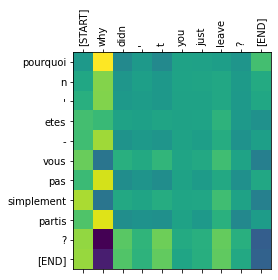

In [ ]:
plot_attention_head(in_tokens, translated_tokens, attention)

#### 3-2) Attention head별 시각화

In [ ]:
def plot_attention_weights(sentence, translated_tokens, attention_heads):
  in_tokens = tf.convert_to_tensor([sentence])
  in_tokens = tokenizers.en.tokenize(in_tokens).to_tensor()
  in_tokens = tokenizers.en.lookup(in_tokens)[0]
  in_tokens

  fig = plt.figure(figsize=(16, 8))

  for h, head in enumerate(attention_heads):
    ax = fig.add_subplot(2, 4, h+1)

    plot_attention_head(in_tokens, translated_tokens, head)

    ax.set_xlabel(f'Head {h+1}')

  plt.tight_layout()
  plt.show()

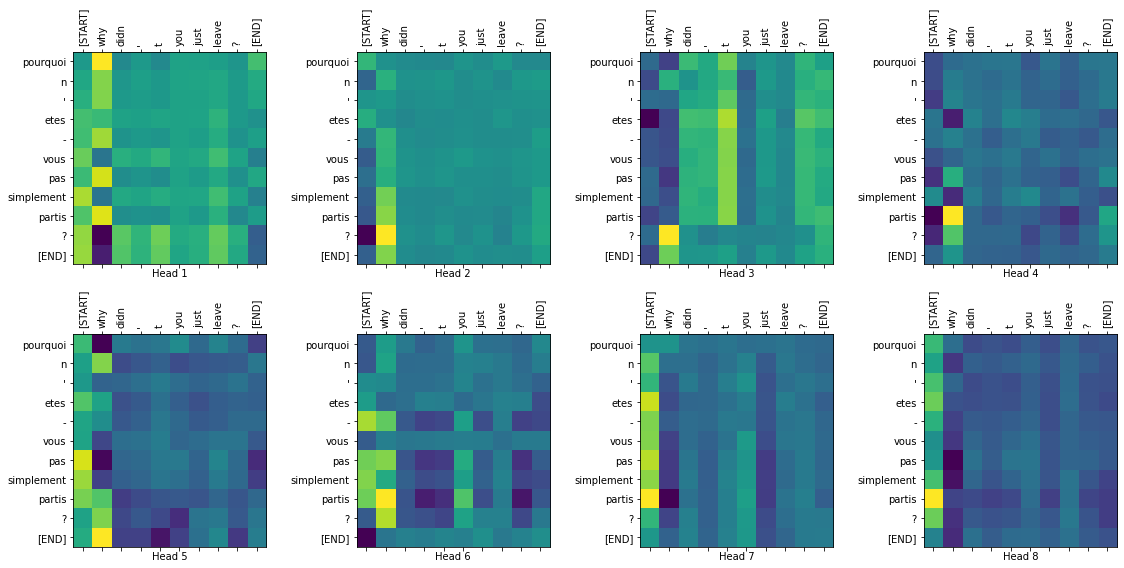

In [ ]:
plot_attention_weights(sentence, translated_tokens,
                       attention_weights['decoder_layer4_block2'][0])

## 8. 결론

### 1) 결론

#### 1-1) 가설 검정


30 epochs만 진행한 모델에서도 주어에 맞는 동사변화나 시제, 도치법이 완벽하진 않더라도 비슷하게 사용되었기 때문에

> 10만 개의 데이터로 학습된 번역 모델은 문법적 특성을 지키지 못한다.

라는 **가설은 틀린 것**으로 검증됨.



#### 1-2) 모델 비교

모델을 30 epochs 와 100 epochs로 학습시킨 결과, <br>
**Accuracy**는 **10% 정도 차이** 나지만 **Loss**는 100 epochs 만큼 학습시킨 모델이 **38% 적은 것으로** 나타남. 

번역 결과를 봤을 때도 **100 epochs** 만큼 학습 시킨 모델이 **실제 번역과 조금 더 유사**하게 번역했지만 <br> 프랑스어 **사전에 없는 단어들을 만들어내기도** 함.

### 2) 한계점 및 추후 해결 방안

1. 번역 결과 출력 <br>
- 프랑스어의 악센트(accent), 대문자 표현 불가

- 토큰화된 문장을 다시 텍스트로 변환해 주는 **detokenize의 설정을 수정**해 볼 것.  

2. 모델 성능 평가지표 <br>
- Accuracy 사용

- 추후에는 기계 번역 결과와 사람이 직접 번역한 결과가 얼마나 유사한지 비교하는 대표적인 기계 번역 성능 평가 방식인 <br> **BLEU Score**를 사용해 성능을 다시 측정해 볼 것.

3. 일방향 번역

- 영어 -> 프랑스어로만 번역 가능

- 추후에는 영어 <-> 프랑스어 양방향 번역뿐만 아니라 <br> **제로샷 학습**(Zero-shot learning), **mT5 모델**을 이용해 한국어 <-> 프랑스어 번역이 가능한 **다국어 번역 모델**로 발전시킬 것. 